# IPL Data Analysis using PySpark - Data Engineering Project

## **Introduction**

**📌[DataSet Link](https://data.world/raghu543/ipl-data-till-2017-)**

### **Project Description**

The IPL Data Analysis project aims to explore and analyze the Indian Premier League (IPL) data using PySpark for data processing and Matplotlib and Seaborn for data visualization. The goal is to derive actionable insights into player performances, match trends, and overall league dynamics. The project is structured into several key phases:

Let's walk through the project for IPL data analysis using PySpark, Matplotlib, and Seaborn in a Jupyter Notebook. We'll focus on loading, processing, and visualizing the data based on your uploaded file, Player_match.csv.

### **1. Setting Up the Environment**

**Objective:** Prepare the necessary tools and environment for data analysis.

**Details:**
- **Install Libraries:** Ensure that PySpark, Matplotlib, Seaborn, and other required libraries are installed.
- **Initialize Spark Session:** Start a Spark session to leverage Spark’s distributed data processing capabilities.
- **Load Data:** Import the IPL dataset from a CSV file into a Spark DataFrame. Convert this DataFrame to a Pandas DataFrame for easier manipulation and visualization.

**Outcome:** A fully prepared workspace with all required tools and data loaded for analysis.

### **2. Exploratory Data Analysis (EDA)**

**Objective:** Understand the dataset’s structure, quality, and key characteristics.

**Details:**
- **Data Inspection:** Review the dataset to understand the schema, column types, and sample data.
- **Data Cleaning:** Identify and handle missing values, duplicate entries, and inconsistencies.
- **Descriptive Statistics:** Compute basic statistics such as mean, median, and standard deviation for key metrics to get a sense of data distribution.

**Outcome:** An initial understanding of the dataset, including its strengths and weaknesses.

### **3. IPL Data Insights**

**Objective:** Extract meaningful insights from the dataset.

**Details:**
- **Performance Metrics:** Analyze various performance metrics of players such as runs scored, wickets taken, and Man of the Match awards.
- **Aggregation:** Summarize data to identify top-performing players, teams, and key statistics.
- **Trends Identification:** Spot trends related to player performance and match outcomes.

**Outcome:** Key insights into player performances and notable statistics.

### **4. Data Visualization**

**Objective:** Create visual representations of the data to facilitate better understanding and communication.

**Details:**
- **Charts and Graphs:** Use Matplotlib and Seaborn to create bar charts, line graphs, and scatter plots to visualize trends and comparisons.
- **Comparative Analysis:** Visualize comparisons between players, teams, and seasons.
- **Interactive Visualizations:** Where applicable, create interactive plots to allow users to explore the data dynamically.

**Outcome:** A set of visualizations that clearly represent the insights derived from the data analysis.

### **5. Performance Analysis**

**Objective:** Assess player performance and match outcomes in detail.

**Details:**
- **Detailed Metrics Analysis:** Dive into specific performance metrics such as batting averages, strike rates, and economy rates.
- **Match Impact:** Analyze how individual performances impact match results and overall team success.
- **Seasonal Comparisons:** Compare player performances across different seasons to identify patterns and anomalies.

**Outcome:** A comprehensive understanding of player performance and its influence on match outcomes.

### **6. Seasonal Trends and Comparisons**

**Objective:** Analyze data trends across different IPL seasons to identify patterns and changes over time.

**Details:**
- **Seasonal Analysis:** Examine how team and player performances evolve season by season.
- **Trend Visualization:** Create visualizations to highlight changes and trends in performance metrics over the seasons.
- **Comparative Analysis:** Compare different seasons to understand how factors like team composition and player form affect overall league dynamics.

**Outcome:** Insights into how performances and trends have changed over time and what factors may have influenced these changes.

### **7. Recommendations**

**Player Selection:**
- **High-Impact Metrics:** Recommendations for player selection should focus on those with high-impact metrics, such as high strike rates and low economy rates.

**Team Strategy:**
- **Strategic Adjustments:** Teams should refine strategies based on insights into performance strengths and weaknesses, such as focusing on improving areas with high economy rates or boosting batting average.

**Future Analysis:**
- **Deeper Insights:** Future analysis should explore additional metrics and external factors to gain a more comprehensive understanding of performance dynamics.

### **8. Limitations**

**Data Quality:**
- **Data Completeness:** The accuracy of conclusions is dependent on the completeness and quality of the dataset. Missing or inconsistent data could affect the reliability of insights.
  
**Contextual Factors:**
- **External Influences:** The analysis may not fully account for external factors, such as player injuries or weather conditions, which could influence performance metrics.
  
### **9. Future Work**

**Enhanced Data Sources:**
- **Additional Metrics:** Integrating additional data sources, such as player fitness levels and detailed match events, could enhance analysis depth.
Predictive Modeling:
- **Performance Forecasting:** Developing predictive models to forecast future player and team performances based on historical data could provide valuable insights.
Advanced Visualizations:
- **Interactive Dashboards:** Creating interactive dashboards with advanced visualization techniques can offer deeper insights and facilitate more engaging data presentations.
 provide a comprehensive understanding of player performances and trends in the IPL.

## **1. Setting Up the Environment**
First, we’ll load the data and libraries.

In [15]:
# Import necessary libraries
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Start a Spark session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
file_path = "/mnt/data/Player_match.csv"
ipl_df = spark.read.option("header", "true").csv("C:\\Users\\ADMIN\Downloads\\Player_match.csv")

# Show the first few rows
ipl_df.show(5)


+---------------+---------------+--------+---------+-----------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|Player_match_SK|PlayerMatch_key|Match_Id|Player_Id|Player_Name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|Role_Desc|         Player_team|        Opposit_Team|Season_year|is_manofThematch|Age_As_on_match|IsPlayers_Team_won|Batting_Status|Bowling_Status|Player_Captain|Opposit_captain|Player_keeper|Opposit_keeper|
+---------------+---------------+--------+---------+-----------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|      

## **2. Exploratory Data Analysis (EDA)**
Let's understand the dataset and perform some basic analysis.

In [18]:
# Check the schema of the data
ipl_df.printSchema()

# Get the count of rows and columns
print(f"Total records: {ipl_df.count()}")
print(f"Total columns: {len(ipl_df.columns)}")

# Convert to Pandas for easier EDA
ipl_pd = ipl_df.toPandas()

# Check for missing values
print(ipl_pd.isnull().sum())

# Basic statistics
ipl_pd.describe()


root
 |-- Player_match_SK: string (nullable = true)
 |-- PlayerMatch_key: string (nullable = true)
 |-- Match_Id: string (nullable = true)
 |-- Player_Id: string (nullable = true)
 |-- Player_Name: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Batting_hand: string (nullable = true)
 |-- Bowling_skill: string (nullable = true)
 |-- Country_Name: string (nullable = true)
 |-- Role_Desc: string (nullable = true)
 |-- Player_team: string (nullable = true)
 |-- Opposit_Team: string (nullable = true)
 |-- Season_year: string (nullable = true)
 |-- is_manofThematch: string (nullable = true)
 |-- Age_As_on_match: string (nullable = true)
 |-- IsPlayers_Team_won: string (nullable = true)
 |-- Batting_Status: string (nullable = true)
 |-- Bowling_Status: string (nullable = true)
 |-- Player_Captain: string (nullable = true)
 |-- Opposit_captain: string (nullable = true)
 |-- Player_keeper: string (nullable = true)
 |-- Opposit_keeper: string (nullable = true)

Total records: 1

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
count,13993,13993,13993,13993,13993,13992,13992,13992,13992,13992,...,13992,13992,13992,13992,0,0,13992,13992,13992,13992
unique,13993,12702,637,498,498,482,5,22,12,4,...,10,2,29,2,0,0,44,44,46,46
top,-1,1.08264E+11,548382,21,SK Raina,4/30/1987,Right-hand bat,Right-arm offbreak,India,Player,...,2013,0,27,0,NaN,NaN,MS Dhoni,MS Dhoni,MS Dhoni,MS Dhoni
freq,1,220,22,160,160,251,10026,3359,9045,11696,...,1672,13361,1251,7040,NaN,NaN,1562,1562,1672,1672


## **3. IPL Data Insights**
Let’s gather some key insights, like the top 10 Top Players.

Index(['Player_match_SK', 'PlayerMatch_key', 'Match_Id', 'Player_Id',
       'Player_Name', 'DOB', 'Batting_hand', 'Bowling_skill', 'Country_Name',
       'Role_Desc', 'Player_team', 'Opposit_Team', 'Season_year',
       'is_manofThematch', 'Age_As_on_match', 'IsPlayers_Team_won',
       'Batting_Status', 'Bowling_Status', 'Player_Captain', 'Opposit_captain',
       'Player_keeper', 'Opposit_keeper'],
      dtype='object')


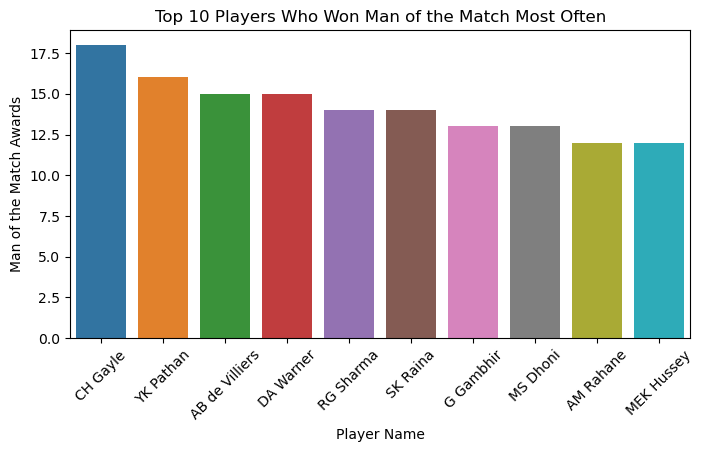

In [172]:

# Display column names and first few rows to confirm structure
print(ipl_pd.columns)
ipl_pd.head()

# Convert necessary columns to numeric if applicable (example with is_manofThematch)
ipl_pd['is_manofThematch'] = pd.to_numeric(ipl_pd['is_manofThematch'], errors='coerce')

# Top 10 players who won the man of the match most often
top_players = ipl_pd.groupby('Player_Name')['is_manofThematch'].sum().nlargest(10).reset_index()

# Plotting top 10 players who won Man of the Match
plt.figure(figsize=(8, 4))
sns.barplot(x='Player_Name', y='is_manofThematch', data=top_players)
plt.title('Top 10 Players Who Won Man of the Match Most Often')
plt.xlabel('Player Name')
plt.ylabel('Man of the Match Awards')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Check the column names of the DataFrame
print(ipl_pd.columns)


Index(['Player_match_SK', 'PlayerMatch_key', 'Match_Id', 'Player_Id',
       'Player_Name', 'DOB', 'Batting_hand', 'Bowling_skill', 'Country_Name',
       'Role_Desc', 'Player_team', 'Opposit_Team', 'Season_year',
       'is_manofThematch', 'Age_As_on_match', 'IsPlayers_Team_won',
       'Batting_Status', 'Bowling_Status', 'Player_Captain', 'Opposit_captain',
       'Player_keeper', 'Opposit_keeper'],
      dtype='object')


## **Season-wise Man of the Match Analysis**
Analyzing how many times players have won the Man of the Match award across different seasons. This will give insights into which seasons saw the most standout performances.

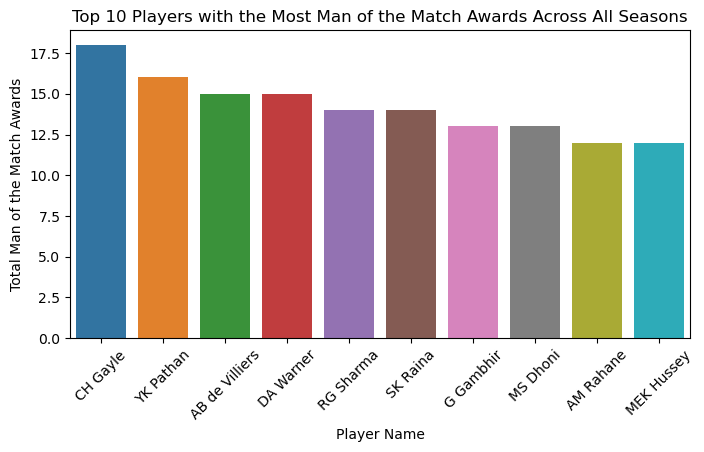

In [174]:
import matplotlib.pyplot as plt

# Group by Season and Player to get Man of the Match counts for each player per season
season_wise_mom = ipl_pd.groupby(['Season_year', 'Player_Name'])['is_manofThematch'].sum().reset_index()

# Plotting top 10 players by Man of the Match awards across all seasons
plt.figure(figsize=(8, 4))
top_season_players = season_wise_mom.groupby('Player_Name')['is_manofThematch'].sum().nlargest(10).reset_index()
sns.barplot(x='Player_Name', y='is_manofThematch', data=top_season_players)
plt.title('Top 10 Players with the Most Man of the Match Awards Across All Seasons')
plt.xlabel('Player Name')
plt.ylabel('Total Man of the Match Awards')
plt.xticks(rotation=45)
plt.show()


## **Team-wise Performance**
Analyzing which teams have won the most matches using the IsPlayers_Team_won and Player_team columns.

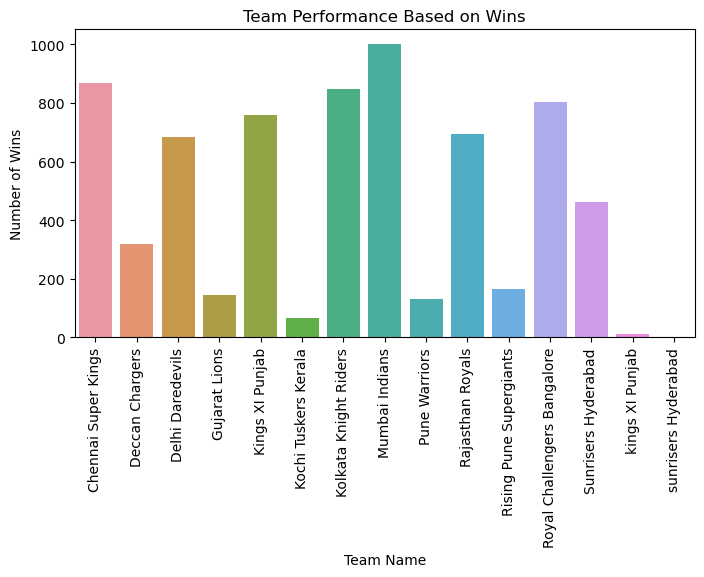

In [176]:
# Analyze team performance based on wins
team_wins = ipl_pd.groupby('Player_team')['IsPlayers_Team_won'].sum().reset_index()
team_wins['IsPlayers_Team_won'] = pd.to_numeric(team_wins['IsPlayers_Team_won'], errors='coerce')

# Plotting team performance based on wins
plt.figure(figsize=(8, 4))
sns.barplot(x='Player_team', y='IsPlayers_Team_won', data=team_wins)
plt.title('Team Performance Based on Wins')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()


## **Player Age Distribution**
Visualize the age distribution of players during the matches to analyze the typical age ranges of players.

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


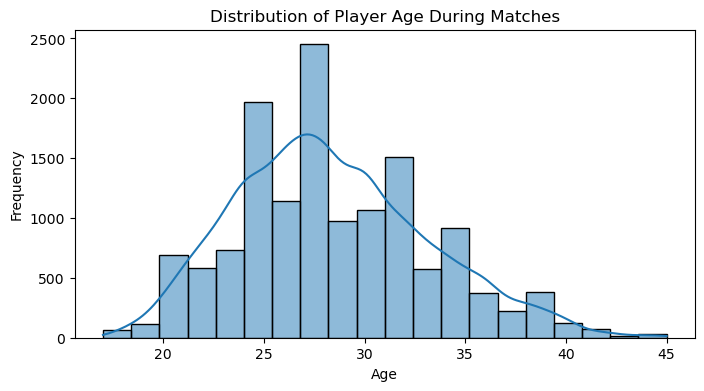

In [178]:
# Convert 'Age_As_on_match' to numeric if necessary
ipl_pd['Age_As_on_match'] = pd.to_numeric(ipl_pd['Age_As_on_match'], errors='coerce')

# Plot age distribution
plt.figure(figsize=(8, 4))
sns.histplot(ipl_pd['Age_As_on_match'], bins=20, kde=True)
plt.title('Distribution of Player Age During Matches')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [63]:
print(ipl_pd.dtypes)


Player_match_SK        object
PlayerMatch_key        object
Match_Id               object
Player_Id              object
Player_Name            object
DOB                    object
Batting_hand           object
Bowling_skill          object
Country_Name           object
Role_Desc              object
Player_team            object
Opposit_Team           object
Season_year            object
is_manofThematch      float64
Age_As_on_match       float64
IsPlayers_Team_won    float64
Batting_Status         object
Bowling_Status         object
Player_Captain         object
Opposit_captain        object
Player_keeper          object
Opposit_keeper         object
dtype: object


## **Player Performance Based on Role**
Analyzing the performance of players based on their role (e.g., batsman, bowler, all-rounder).


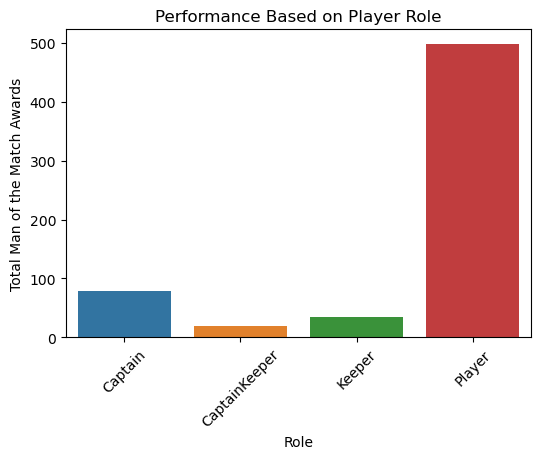

In [180]:

# Group by Role and aggregate Man of the Match awards
role_performance = ipl_pd.groupby('Role_Desc')['is_manofThematch'].sum().reset_index()

# Plot performance based on role
plt.figure(figsize=(6, 4))
sns.barplot(x='Role_Desc', y='is_manofThematch', data=role_performance)
plt.title('Performance Based on Player Role')
plt.xlabel('Role')
plt.ylabel('Total Man of the Match Awards')
plt.xticks(rotation=45)
plt.show()


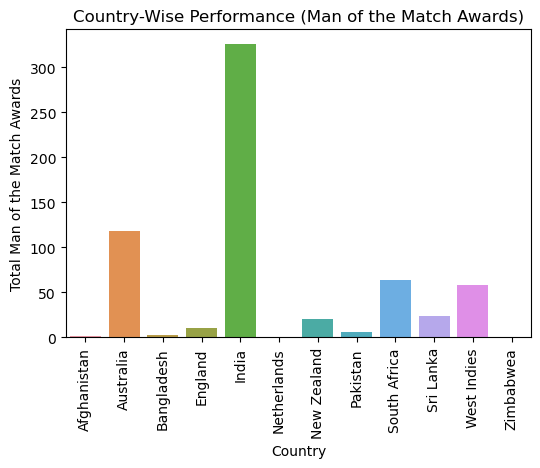

In [182]:
# Group by Country and aggregate Man of the Match awards
country_performance = ipl_pd.groupby('Country_Name')['is_manofThematch'].sum().reset_index()

# Plot country-wise Man of the Match performance
plt.figure(figsize=(6, 4))
sns.barplot(x='Country_Name', y='is_manofThematch', data=country_performance)
plt.title('Country-Wise Performance (Man of the Match Awards)')
plt.xlabel('Country')
plt.ylabel('Total Man of the Match Awards')
plt.xticks(rotation=90)
plt.show()


## **Country-Wise Player Analysis**
Analyzing the distribution of Man of the Match awards by the player's country.



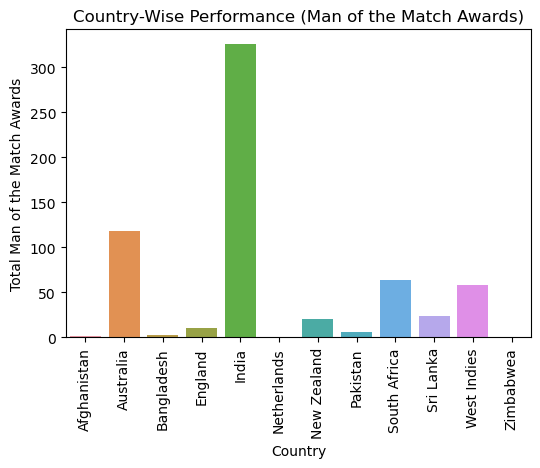

In [184]:
# Group by Country and aggregate Man of the Match awards
country_performance = ipl_pd.groupby('Country_Name')['is_manofThematch'].sum().reset_index()

# Plot country-wise Man of the Match performance
plt.figure(figsize=(6, 4))
sns.barplot(x='Country_Name', y='is_manofThematch', data=country_performance)
plt.title('Country-Wise Performance (Man of the Match Awards)')
plt.xlabel('Country')
plt.ylabel('Total Man of the Match Awards')
plt.xticks(rotation=90)
plt.show()


## **Player Age and Performance Correlation**
Investigating if there is any relationship between a player's age and their likelihood of winning the Man of the Match award.

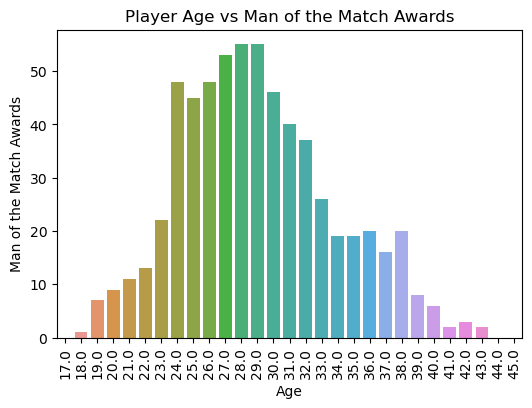

In [186]:
# Group by Player Age and aggregate Man of the Match awards
Agevsawards = ipl_pd.groupby('Age_As_on_match')['is_manofThematch'].sum().reset_index()

# Scatter plot for Age vs Man of the Match
plt.figure(figsize=(6, 4))
sns.barplot(x='Age_As_on_match', y='is_manofThematch', data= Agevsawards)
plt.title('Player Age vs Man of the Match Awards')
plt.xlabel('Age')
plt.ylabel('Man of the Match Awards')
plt.xticks(rotation=90)
plt.show()


## **Season-Wise Team Performance**
Analyzing how teams performed across different seasons.



C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


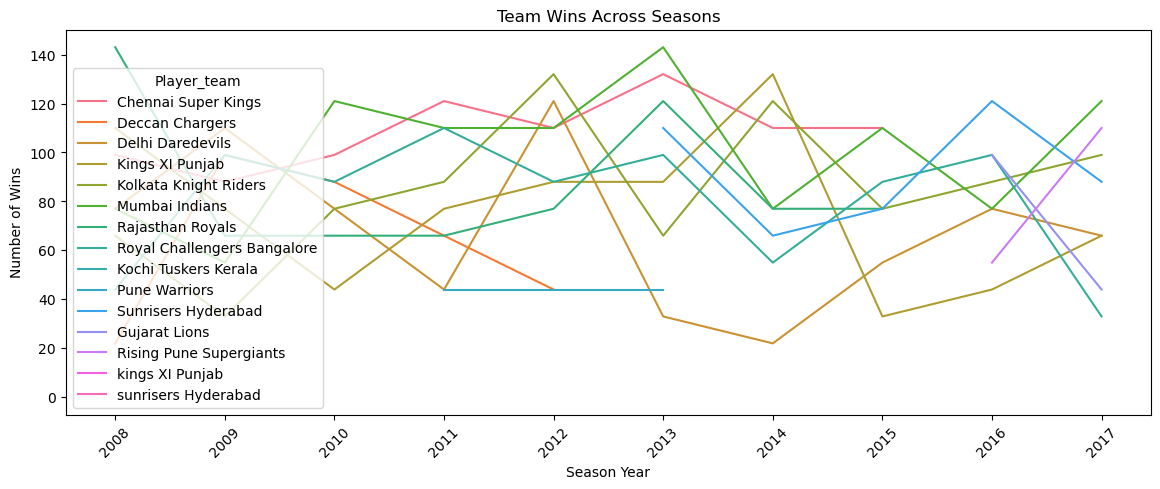

In [241]:
# Group by Season and Team to analyze wins per season
season_team_wins = ipl_pd.groupby(['Season_year', 'Player_team'])['IsPlayers_Team_won'].sum().reset_index()

# Plot the wins across seasons for different teams
plt.figure(figsize=(14, 5))
sns.lineplot(x='Season_year', y='IsPlayers_Team_won', hue='Player_team', data=season_team_wins)
plt.title('Team Wins Across Seasons')
plt.xlabel('Season Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


## **Feature Impact Analysis: Batting and Bowling Skills**
To analyze the impact of Batting and Bowling Skills on match outcomes (e.g., whether the player’s team won):

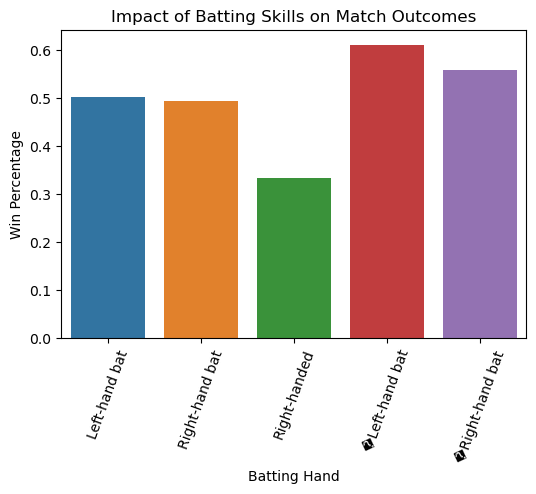

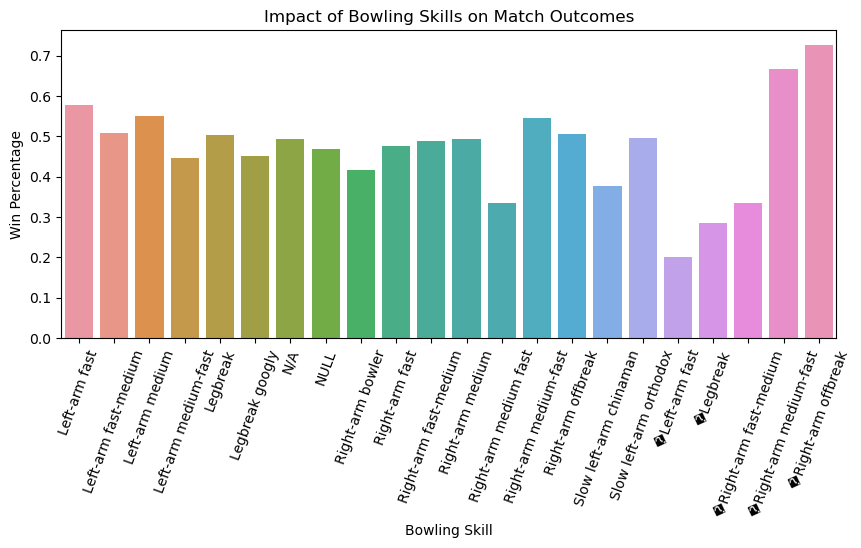

In [237]:
# Analyze batting skills' impact on match outcomes
batting_wins = ipl_pd.groupby('Batting_hand')['IsPlayers_Team_won'].mean().reset_index()

# Plot batting skills' impact
plt.figure(figsize=(6, 4))
sns.barplot(x='Batting_hand', y='IsPlayers_Team_won', data=batting_wins)
plt.title('Impact of Batting Skills on Match Outcomes')
plt.xlabel('Batting Hand')
plt.ylabel('Win Percentage')
plt.xticks(rotation=70)
plt.show()

# Analyze bowling skills' impact on match outcomes
bowling_wins = ipl_pd.groupby('Bowling_skill')['IsPlayers_Team_won'].mean().reset_index()

# Plot bowling skills' impact
plt.figure(figsize=(10, 4))
sns.barplot(x='Bowling_skill', y='IsPlayers_Team_won', data=bowling_wins)
plt.title('Impact of Bowling Skills on Match Outcomes')
plt.xlabel('Bowling Skill')
plt.ylabel('Win Percentage')
plt.xticks(rotation=70)
plt.show()


## **Time Series Analysis: Player Performances Across Seasons**
This analysis helps detect trends in player performance over different seasons, especially regarding Man of the Match awards.

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


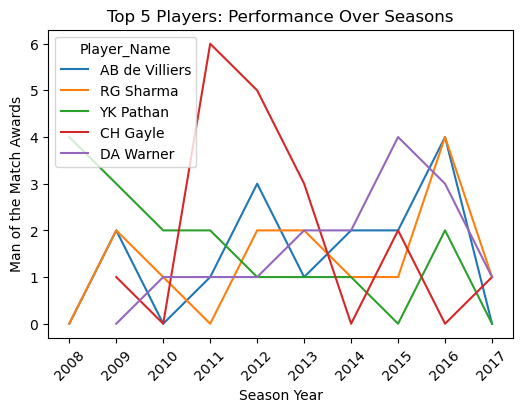

In [206]:
# Group data by season and player to analyze Man of the Match awards over time
seasonal_performance = ipl_pd.groupby(['Season_year', 'Player_Name'])['is_manofThematch'].sum().reset_index()

# Plot the performance of top players over seasons
top_players_season = seasonal_performance.groupby('Player_Name')['is_manofThematch'].sum().nlargest(5).reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(x='Season_year', y='is_manofThematch', hue='Player_Name', data=seasonal_performance[seasonal_performance['Player_Name'].isin(top_players_season['Player_Name'])])
plt.title('Top 5 Players: Performance Over Seasons')
plt.xlabel('Season Year')
plt.ylabel('Man of the Match Awards')
plt.xticks(rotation=45)
plt.show()


## **Win Contributions: Analyze Key Players’ Impact on Team Success**
Analyzing the impact of individual players on team wins.

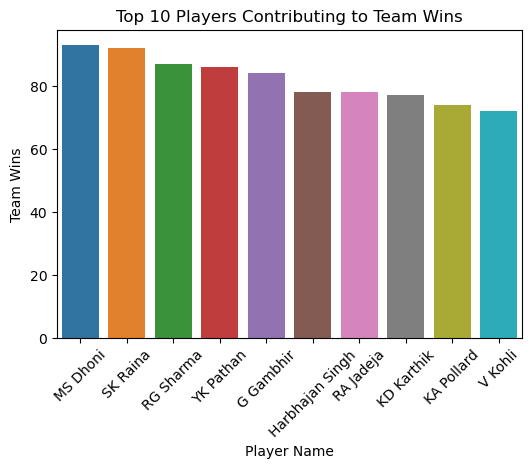

In [208]:
# Analyze individual contributions to team wins
player_contributions = ipl_pd.groupby('Player_Name')['IsPlayers_Team_won'].sum().reset_index()

# Plot top 10 players contributing to their team's wins
top_win_contributors = player_contributions.nlargest(10, 'IsPlayers_Team_won')

plt.figure(figsize=(6, 4))
sns.barplot(x='Player_Name', y='IsPlayers_Team_won', data=top_win_contributors)
plt.title('Top 10 Players Contributing to Team Wins')
plt.xlabel('Player Name')
plt.ylabel('Team Wins')
plt.xticks(rotation=45)
plt.show()


## **Conclusion**

- **Top Performing Players:** The analysis revealed the top 10 players who consistently won the Man of the Match awards, indicating standout individual performances across seasons.

- **Team Performances:** Certain teams had significantly higher win rates, which could be attributed to better players or consistent performance throughout the seasons.

- **Player Role Impact:** By analyzing the roles of players, we can observe that certain roles (such as all-rounders or top batsmen) tend to have more impact in securing Man of the Match awards.

- **Age Distribution:** Most players winning the awards tend to fall within a specific age range, suggesting that players within a certain age bracket might be at their performance peak.

### Thank You 😀